# Assignment 01

In [55]:
%matplotlib inline

In [56]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [57]:
def __init__(self, size):
    self.size = size
    self.X = np.linspace(0, 1, size)
    self.noise = np.random.normal(0, 0.1, size)
    self.ground_truth = np.sin(self.X * 2 * np.pi)
    self.Y = self.ground_truth + self.noise

    self.X_test = self.X[0::2]
    self.X_train = self.X[1::2]
    self.Y_test = self.Y[0::2]
    self.Y_train = self.Y[1::2]

In [58]:
def __init__(self, degree: int, hyper_parameter: float = 0):
    self.degree = degree
    self.hyper_parameter = hyper_parameter
    self.model = None
    self.weights = np.array([])

def train(self, data: Data):
    self.model = make_pipeline(PolynomialFeatures(self.degree),
                                Ridge(alpha=self.hyper_parameter, solver='auto'))
    self.model.fit(data.X_train[:, np.newaxis], data.Y_train)
    self.weights = self.model.steps[-1][1].coef_.copy()
    self.weights[0] = self.model.steps[-1][1].intercept_
    return self.model

def predict(self, X):
    return self.model.predict(X[:, np.newaxis])

def error(self, X, y):
    y_pred = self.predict(X)
    return np.sqrt(mean_squared_error(y, y_pred))

def plot(self, ax, data: Data):
    x_plot = np.linspace(0, 1, 100)
    y_plot = self.predict(x_plot)

    ax.plot(data.X, data.ground_truth, color='lime')
    ax.scatter(data.X_train, data.Y_train, facecolors='none', edgecolors='b')
    ax.plot(x_plot, y_plot, color='red', label=f'M = {self.degree}')
    ax.set_xlim([None, None])
    ax.set_ylim([-1.5, 1.5])
    ax.legend(loc=2, prop={'size': 15}, frameon=True)

    return ax

Create 20 data points with a 10/10 train/test split.
<br>
X values are uniform in the interval [0,1]
<br>
Y values are generated as directed by the professor.

In [59]:
data = Data(20)

Generate and train 10 models, 1 for each degree from [0,9]
<br>
Model weights are calculated using scikit-learn. 

In [60]:
models = [LinearModel(x) for x in range(10)]
for model in models:
    model.train(data)

Print the weights for models with degrees ${0, 1, 6, 9}$

In [61]:
orders = [0, 1, 6, 9]
weights = pd.DataFrame()
for order in orders:
    temp = pd.DataFrame({f'M={order}': models[order].weights})
    weights = pd.concat([weights, temp], axis=1)
weights.round(2).fillna('')

,M=0,M=1,M=6,M=9
0,0.05,0.89,-0.05,4.26
1,,-1.61,8.63,-156.60
2,,,-13.92,2239.93
3,,,-21.47,-15605.85
4,,,23.51,62612.73
5,,,25.22,-154623.50
6,,,-21.88,238109.87
7,,,,-222288.94
8,,,,114898.61
9,,,,-25190.47


Plot models with degrees ${0, 1, 6, 9}$

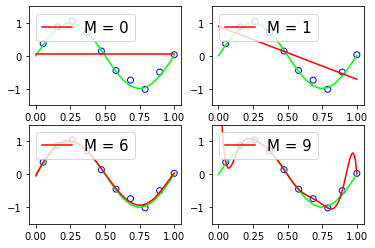

In [62]:
fig, ax = plt.subplots(2, 2)
for i, order in enumerate(orders):
    models[order].plot(ax[i // 2][ i % 2], data)
plt.show()

Notice the plot for $M = 9$ being overfit.

Plot the RMS error for each model

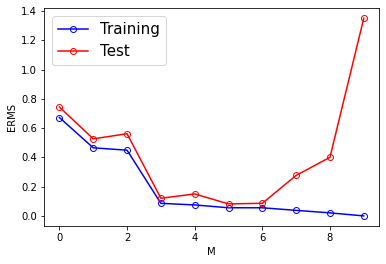

In [63]:
train_errors = []
test_errors = []
degrees = list(range(len(models)))
for model in models:
    train_errors.append(model.error(data.X_train, data.Y_train))
    test_errors.append(model.error(data.X_test, data.Y_test))
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(degrees, train_errors, color='blue', marker='o', markerfacecolor='none', label='Training')
ax.plot(degrees, test_errors, color='red', marker='o', markerfacecolor='none', label='Test')
ax.set_ylabel('ERMS')
ax.set_xlabel('M')
ax.legend(loc=2, prop={'size': 15}, frameon=True)
plt.show()

Generate 100 new data points and fit 9th degree model using 100 train data points.

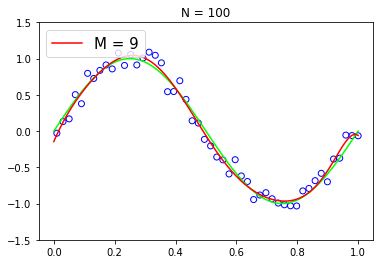

In [64]:
data_big = Data(100)
model9 = LinearModel(9)
model9.train(data_big)
fig, ax = plt.subplots()
model9.plot(ax, data_big)
plt.title('N = 100')
plt.show()

Notice that this model does not seem overfit.

Train 6 new models using regularization with $λ \in {1, 1/10, 1/100, 1/1000, 1/10000, 1/100000}$

In [65]:
hyper_parameters = list(10 ** -x for x in range(6))
models = [LinearModel(9, hp) for hp in hyper_parameters]
for model in models:
    model.train(data)

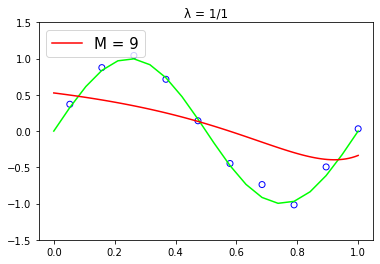

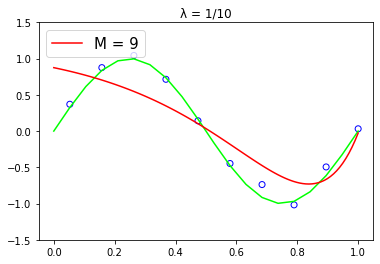

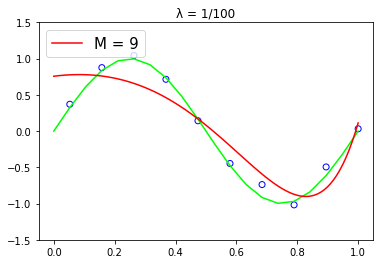

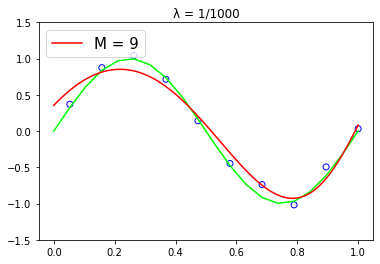

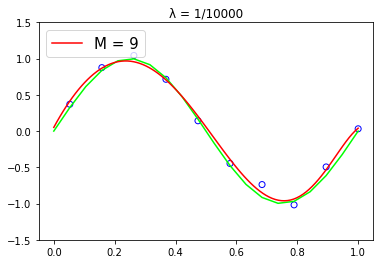

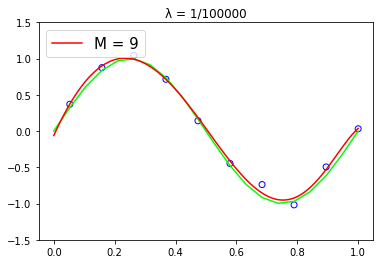

In [66]:
for i, hp in enumerate(hyper_parameters):
    fig, ax = plt.subplots()
    models[i].plot(ax, data)
    plt.title(f'λ = 1/{1/hp:.0f}')
    plt.show()

Train some new models using hyper parameters such that $ln(λ) \in [-30, -4]$

In [67]:
hyper_parameters = np.arange(-30,-4)
models = [LinearModel(9, np.exp(hp)) for hp in hyper_parameters]
for model in models:
    model.train(data)

Plot train and test error for these new models.

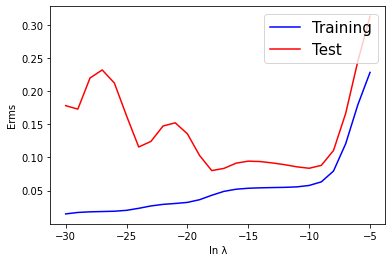

In [68]:
train_errors = []
test_errors = []
for model in models:
    train_errors.append(model.error(data.X_train, data.Y_train))
    test_errors.append(model.error(data.X_test, data.Y_test))
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(hyper_parameters, train_errors, color='blue', label='Training')
ax.plot(hyper_parameters, test_errors, color='red', label='Test')
ax.set_ylabel('Erms')
ax.set_xlabel('ln λ')
ax.legend(loc=1, prop={'size': 15}, frameon=True)
plt.show()

Find the model with lowest test error.

In [69]:
min_index = np.argmin(test_errors)
best_model = models[min_index]
with np.printoptions(precision=3, suppress=True):
    print(f'Based on the test performance, the best model with degree 9 is ln λ = {np.log(best_model.hyper_parameter)}')
    print(f'Weights: {best_model.weights}')

Based on the test performance, the best model with degree 9 is ln λ = -18.0
Weights: [   0.082    4.346   28.015 -187.599  287.269  -22.095 -251.5      3.459
  294.439 -156.382]


Plot the best model found above.

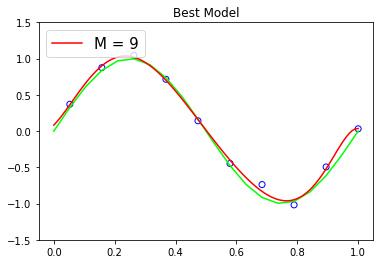

In [70]:
fig, ax = plt.subplots()
best_model.plot(ax, data)
plt.title('Best Model')
plt.show()